# import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

from matplotlib import rc # 폰트
# 유니코드 폰트 설정
rc('font', family='AppleGothic')
# 마이너스 기호 표시 설정
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기 및 전처리

In [2]:
'''
# 온도, 습도 데이터 불러오기
data = pd.read_csv('2002_2022_month(edit).csv')
data
'''

,일시,지점,평균기온,최고기온,최저기온(°C),평균상대습도,최소상대습도
0,2002-01-01,108,0.3,13.5,-12.0,63,22
1,2002-02-01,108,2.9,12.6,-5.1,55,13
2,2002-03-01,108,7.6,19.4,-2.9,55,10
3,2002-04-01,108,13.6,27.7,4.3,53,8
4,2002-05-01,108,18.2,27.7,10.0,62,12
...,...,...,...,...,...,...,...
247,2022-08-01,108,25.7,32.9,16.1,80,39
248,2022-09-01,108,22.4,32.5,12.3,68,29
249,2022-10-01,108,14.6,27.6,4.4,69,25
250,2022-11-01,108,10.0,22.1,-8.1,65,23


In [3]:
'''
# 2010년 ~ 2022년 -> csv 저장
data = data.loc[96: ]
data.to_csv("y10_22_month.csv", index = False)
'''

In [3]:
# 데이터 불러오기
data = pd.read_csv('y10_22_month.csv')
data

,일시,지점,평균기온,최고기온,최저기온(°C),평균상대습도,최소상대습도
0,2010-01-01,108,-4.5,8.4,-15.3,65,26
1,2010-02-01,108,1.4,17.9,-10.8,59,14
2,2010-03-01,108,4.3,14.2,-4.0,59,13
3,2010-04-01,108,9.5,20.7,1.1,54,12
4,2010-05-01,108,17.2,28.6,5.8,62,21
...,...,...,...,...,...,...,...
151,2022-08-01,108,25.7,32.9,16.1,80,39
152,2022-09-01,108,22.4,32.5,12.3,68,29
153,2022-10-01,108,14.6,27.6,4.4,69,25
154,2022-11-01,108,10.0,22.1,-8.1,65,23


In [4]:
# 일시, 평균기온, 평균상대습도 데이터만 추출
data_dta = data.loc[:, ["일시", "평균기온", "평균상대습도"]]
data_dta

,일시,평균기온,평균상대습도
0,2010-01-01,-4.5,65
1,2010-02-01,1.4,59
2,2010-03-01,4.3,59
3,2010-04-01,9.5,54
4,2010-05-01,17.2,62
...,...,...,...
151,2022-08-01,25.7,80
152,2022-09-01,22.4,68
153,2022-10-01,14.6,69
154,2022-11-01,10.0,65


In [5]:
# 컬럼명 변경
data_dta.columns = ['Date', 'MeanTemp', 'ARH']
data_dta

,Date,MeanTemp,ARH
0,2010-01-01,-4.5,65
1,2010-02-01,1.4,59
2,2010-03-01,4.3,59
3,2010-04-01,9.5,54
4,2010-05-01,17.2,62
...,...,...,...
151,2022-08-01,25.7,80
152,2022-09-01,22.4,68
153,2022-10-01,14.6,69
154,2022-11-01,10.0,65


In [6]:
# 의약품가격데이터 불러오기(A05, T61, T78) + 데이터 합치기
A05 = pd.read_excel('A05 2010-2022.xlsx')
T61 = pd.read_excel('T61 2010-2022.xlsx')
T78 = pd.read_excel('T78 2010-2022.xlsx')

# 'Category' 컬럼의 값을 'yyyy-mm-01' 형식으로 변환
A05['Category'] = pd.to_datetime(A05['Category'], format='%Y%m').dt.strftime('%Y-%m-%d')
T61['Category'] = pd.to_datetime(T61['Category'], format='%Y%m').dt.strftime('%Y-%m-%d')
T78['Category'] = pd.to_datetime(T78['Category'], format='%Y%m').dt.strftime('%Y-%m-%d')

AU = pd.merge(A05, T61, on='Category')
AU = pd.merge(AU, T78, on='Category')
AU

,Category,사용금액_x,사용금액_y,사용금액
0,2010-01-01,56398887,3121279,77640736
1,2010-02-01,54440020,1188833,75477647
2,2010-03-01,57782217,1481292,85038128
3,2010-04-01,55537175,12501228,88930460
4,2010-05-01,49199325,2459549,101073739
...,...,...,...,...
151,2022-08-01,42918408,761678,495302437
152,2022-09-01,27768210,777352,465947809
153,2022-10-01,23261359,3207258,416668623
154,2022-11-01,29610163,3638009,421163846


In [7]:
# 컬럼명 변경
AU.columns = ['Date', 'A05', 'T61', 'T78']
AU

,Date,A05,T61,T78
0,2010-01-01,56398887,3121279,77640736
1,2010-02-01,54440020,1188833,75477647
2,2010-03-01,57782217,1481292,85038128
3,2010-04-01,55537175,12501228,88930460
4,2010-05-01,49199325,2459549,101073739
...,...,...,...,...
151,2022-08-01,42918408,761678,495302437
152,2022-09-01,27768210,777352,465947809
153,2022-10-01,23261359,3207258,416668623
154,2022-11-01,29610163,3638009,421163846


In [8]:
# 날짜, 평균온도, 평균상대습도, 의약품가격(3개) 데이터 합치기
f_data = pd.merge(data_dta, AU, on='Date')
f_data

,Date,MeanTemp,ARH,A05,T61,T78
0,2010-01-01,-4.5,65,56398887,3121279,77640736
1,2010-02-01,1.4,59,54440020,1188833,75477647
2,2010-03-01,4.3,59,57782217,1481292,85038128
3,2010-04-01,9.5,54,55537175,12501228,88930460
4,2010-05-01,17.2,62,49199325,2459549,101073739
...,...,...,...,...,...,...
151,2022-08-01,25.7,80,42918408,761678,495302437
152,2022-09-01,22.4,68,27768210,777352,465947809
153,2022-10-01,14.6,69,23261359,3207258,416668623
154,2022-11-01,10.0,65,29610163,3638009,421163846


#### 환자수 데이터

In [9]:
patient = pd.read_excel('월별_연도별_식중독_통계_ (1).xls')
patient

,월,구분,2002년,2003년,2004년,2005년,2006년,2007년,2008년,2009년,...,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,합계
0,1,발생건수,4,2,3,4,6,31,13,14,...,36,14,20,17,21,28,9,9,332,NaN
1,1,환자수,266,92,148,142,52,730,177,126,...,322,98,121,125,216,217,292,136,4650,NaN
2,2,발생건수,2,0,3,2,4,28,14,22,...,13,9,18,15,16,9,11,7,279,NaN
3,2,환자수,179,0,58,78,52,277,144,279,...,149,51,89,194,109,75,298,123,3848,NaN
4,3,발생건수,6,26,3,3,8,41,23,20,...,23,25,16,37,19,3,21,13,423,NaN
5,3,환자수,184,2525,112,44,319,820,680,753,...,412,358,146,816,504,117,401,422,11874,NaN
6,4,발생건수,12,7,14,16,8,42,31,26,...,30,39,26,25,31,8,24,12,512,NaN
7,4,환자수,454,208,742,865,75,959,751,709,...,402,554,409,444,543,112,417,148,12005,NaN
8,5,발생건수,10,25,35,12,6,65,28,36,...,27,43,40,31,35,5,18,27,604,NaN
9,5,환자수,298,1916,2678,689,809,1296,627,1232,...,493,673,605,853,438,19,194,503,17893,NaN


In [10]:
idx = patient[patient['구분'].str.contains('발생건수')].index
patient = patient.drop(idx)
patient

,월,구분,2002년,2003년,2004년,2005년,2006년,2007년,2008년,2009년,...,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,합계
1,1,환자수,266,92,148,142,52,730,177,126,...,322,98,121,125,216,217,292,136,4650,NaN
3,2,환자수,179,0,58,78,52,277,144,279,...,149,51,89,194,109,75,298,123,3848,NaN
5,3,환자수,184,2525,112,44,319,820,680,753,...,412,358,146,816,504,117,401,422,11874,NaN
7,4,환자수,454,208,742,865,75,959,751,709,...,402,554,409,444,543,112,417,148,12005,NaN
9,5,환자수,298,1916,2678,689,809,1296,627,1232,...,493,673,605,853,438,19,194,503,17893,NaN
11,6,환자수,231,1501,2626,1062,4567,1803,1256,1318,...,752,761,916,732,532,488,343,1028,24837,NaN
13,7,환자수,349,88,495,346,348,849,354,378,...,527,280,429,630,550,688,1293,650,10950,NaN
15,8,환자수,212,364,372,639,1514,754,538,324,...,1729,2388,1555,1536,333,160,878,538,18510,NaN
17,9,환자수,276,951,1832,788,1161,1343,1207,301,...,400,425,745,5239,136,157,335,581,19583,NaN
19,10,환자수,97,88,503,51,216,287,454,416,...,299,731,332,608,227,171,222,437,6255,NaN


In [11]:
desired_columns = ['월', '2010년', '2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년', '2022년']
patient = patient.loc[:, desired_columns]

idx1 = patient[patient['월'].str.contains('합계')].index
patient = patient.drop(idx1)

patient

,월,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
1,1,142,137,294,286,56,322,98,121,125,216,217,292,136
3,2,430,351,392,50,80,149,51,89,194,109,75,298,123
5,3,364,690,296,327,1063,412,358,146,816,504,117,401,422
7,4,893,827,387,896,371,402,554,409,444,543,112,417,148
9,5,201,1017,680,252,1548,493,673,605,853,438,19,194,503
11,6,1908,414,503,677,955,752,761,916,732,532,488,343,1028
13,7,561,740,300,611,484,527,280,429,630,550,688,1293,650
15,8,770,1482,590,405,1429,1729,2388,1555,1536,333,160,878,538
17,9,783,809,1403,450,261,400,425,745,5239,136,157,335,581
19,10,335,194,189,141,257,299,731,332,608,227,171,222,437


In [12]:
# '월' 컬럼을 문자열로 변환하여 'Date' 컬럼 생성
patient['Date'] = pd.to_datetime(patient['월'], format='%m').dt.to_period('M')
patient = patient.drop(columns=['월'])

# 데이터프레임 재구성
new_df = patient.melt(id_vars='Date', var_name='Year', value_name='patient')
new_df['Year'] = new_df['Year'].str.extract('(\d+)').astype(int)
new_df['Date'] = new_df.apply(lambda row: pd.Timestamp(year=row['Year'], month=row['Date'].month, day=1), axis=1)
new_df = new_df.sort_values(by=['Date'])

new_df

,Date,Year,patient
0,2010-01-01,2010,142
1,2010-02-01,2010,430
2,2010-03-01,2010,364
3,2010-04-01,2010,893
4,2010-05-01,2010,201
...,...,...,...
151,2022-08-01,2022,538
152,2022-09-01,2022,581
153,2022-10-01,2022,437
154,2022-11-01,2022,308


In [13]:
patient = new_df.loc[:, ['Date', 'patient']]
patient

,Date,patient
0,2010-01-01,142
1,2010-02-01,430
2,2010-03-01,364
3,2010-04-01,893
4,2010-05-01,201
...,...,...
151,2022-08-01,538
152,2022-09-01,581
153,2022-10-01,437
154,2022-11-01,308


In [14]:
patient['Date'] = pd.to_datetime(patient['Date'])
data_dta['Date'] = pd.to_datetime(patient['Date'])

In [15]:
f_patient = pd.merge(data_dta, patient, on='Date')
f_patient

,Date,MeanTemp,ARH,patient
0,2010-01-01,-4.5,65,142
1,2010-02-01,1.4,59,430
2,2010-03-01,4.3,59,364
3,2010-04-01,9.5,54,893
4,2010-05-01,17.2,62,201
...,...,...,...,...
151,2022-08-01,25.7,80,538
152,2022-09-01,22.4,68,581
153,2022-10-01,14.6,69,437
154,2022-11-01,10.0,65,308


In [17]:
f_patient = f_patient.to_csv("f_patient.csv", index = False)

# 상관분석

-1.0 ~ -0.7 : 강한 음적 선형관계

-0.7 ~ -0.3 : 뚜렷한 음적 선형관계

-0.3 ~ -0.1 : 약한 음적 선형관계

-0.1 ~ +0.1 : 거의 무시될 수 있는 선형관계

+0.1 ~ +0.3 : 약한 양적 선형관계

+0.3 ~ +0.7 : 뚜렷한 양적 선형관계

+0.7 ~ +1.0 : 강한 양적 선형관계

In [8]:
# 일시, 온도, 습도 상관분석
corr_dta = data_dta.corr()
corr_dta

,MeanTemp,ARH
MeanTemp,1.000000,0.668085
ARH,0.668085,1.000000


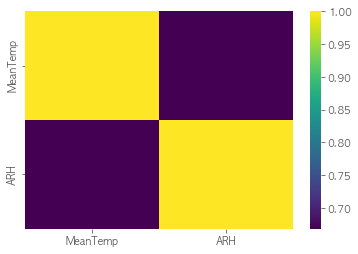

In [9]:
sns.heatmap(corr_dta, cmap = 'viridis')
plt.show()

In [11]:
# 날짜, 평균온도, 평균상대습도, 의약품가격(3개) 데이터 상관분석
corr_f_data = f_data.corr()
corr_f_data

,MeanTemp,ARH,A05,T61,T78
MeanTemp,1.000000,0.668085,0.291074,-0.229185,0.209379
ARH,0.668085,1.000000,0.331933,-0.164565,0.275369
A05,0.291074,0.331933,1.000000,-0.121720,-0.523146
T61,-0.229185,-0.164565,-0.121720,1.000000,-0.080207
T78,0.209379,0.275369,-0.523146,-0.080207,1.000000


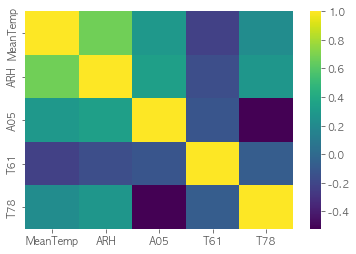

In [12]:
sns.heatmap(corr_f_data, cmap = 'viridis')
plt.show()

In [89]:
# 날짜, 평균온도, 평균상대습도, 환자수 데이터 상관분석
corr_f_patient = f_patient.corr()
corr_f_patient

,MeanTemp,ARH,patient
MeanTemp,1.000000,0.668085,0.409465
ARH,0.668085,1.000000,0.221019
patient,0.409465,0.221019,1.000000


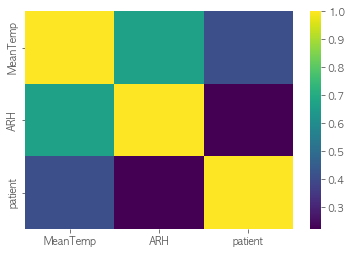

In [90]:
sns.heatmap(corr_f_patient, cmap = 'viridis')
plt.show()